# Hackathon Goal: Asset Health Score
Author: Lavinia Wang<br>
@Showpad

- Segment marketing content by lifetime engagement and recent engagement
    * Create recent engagement report for each marketing-created asset from user activity data export
    * Compare lifetime engagement to recent engagement of marketing-created assets in Showpad library to 
    * Create an “asset health score” for each marketing-created asset in Showpad library from all engagement data  
    * Visualize the health scores with an Experience App

In [1]:
## Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import math

In [56]:
## Load file into pandas
## Data starts in row #2
mkt_lib = pd.read_csv("/Users/liyan.wang/Desktop/Hackathon/Sample Showpad Report Exports/library-marketing-content showpad-export-20190709.csv", 
                 header=0)
user_act = pd.read_csv("/Users/liyan.wang/Desktop/Hackathon/Sample Showpad Report Exports/user-activity export.csv", 
                 header=0)
top_mkt = pd.read_csv("/Users/liyan.wang/Desktop/Hackathon/Sample Showpad Report Exports/top-content-marketing.csv", 
                 header=0)

In [57]:
print("library marketing content has shape: ", mkt_lib.shape)
print("user activity has shape: ", user_act.shape)
print("top content marketing has shape: ", top_mkt.shape)

library marketing content has shape:  (878, 13)
user activity has shape:  (4624, 10)
top content marketing has shape:  (472, 19)


In [ ]:
mkt_lib.head()

In [3]:
mkt_lib['uploaded date'] = pd.to_datetime(mkt_lib['uploaded date'])
mkt_lib.describe(include='all')

,id,asset name,size,uploaded date,expiry date,tags,used in channels,annotatable,confidential,shareable,(page)views,likes,slug
count,878,878,8.590000e+02,878,19,88,857,878.000000,878.000000,878.000000,878.000000,878.000000,878
unique,878,865,NaN,842,3,63,494,NaN,NaN,NaN,NaN,NaN,878
top,0fd4680c056acc8b8c2a8be44fdb39f9,SHOWPAD_FOR_SALES.png,NaN,2018-02-22 11:29:19,2019-03-10 23:00:00,Adobe AEM,"SE Channel, SE Channel",NaN,NaN,NaN,NaN,NaN,839c576e55df6adc1d5a18a92909cf0e
freq,1,2,NaN,5,14,5,39,NaN,NaN,NaN,NaN,NaN,1
first,NaN,NaN,NaN,2015-10-26 20:54:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-06-21 23:12:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.684530e+07,NaN,NaN,NaN,NaN,0.576310,0.002278,0.970387,573.542141,0.156036,NaN
std,NaN,NaN,9.764371e+07,NaN,NaN,NaN,NaN,0.494424,0.047700,0.169613,1755.217202,0.582550,NaN
min,NaN,NaN,1.284000e+03,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,1.645305e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,15.000000,0.000000,NaN


In [ ]:
user_act.head(10)

In [ ]:
user_act.describe(include="all")

In [ ]:
user_act.columns

In [4]:
## Remove rows that file name is NaN
user_act_copy = user_act.dropna(subset = ['File Name'])
user_act_copy.Date = pd.to_datetime(user_act_copy['Date'])
user_act_copy.shape

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(3921, 10)

In [ ]:
top_mkt.head()

In [ ]:
top_mkt.describe(include='all')

## Variable Exploration 

In [ ]:
## Function that takes dataframe group by each categorical column/variable
## Output a table shows grouping numbers by different levels and a bar chart to visualize

def exploration(data, variable):
    lst = data.groupby(by=variable).count()
    lst = lst['id']
    print(lst)
    lst.plot.bar()  

In [ ]:
c_like = exploration(mkt_lib,'likes')

In [ ]:
c_page_views = mkt_lib['(page)views'].plot.line()

## Transformation

- <b> user activity export</b>

In [5]:
user_act_file = pd.DataFrame(user_act_copy.groupby(by='File Name').agg('sum'))

print("shape of user activity(group by file name) is: ", user_act_file.shape)
user_act_file.head()

shape of user activity(group by file name) is:  (655, 2)


,Number of File Views,Number of File Downloads
File Name,,
1 Minute Testimonial.mp4,0.0,0.0
1. EF presentation Utrecht event.pdf,0.0,1.0
10 Users.pdf,14.0,0.0
20 Users.pdf,2.0,0.0
2019 Personas Overview - Personas.pdf,0.0,1.0


In [6]:
date_last_activity = user_act_copy[['File Name','Date']].drop_duplicates().groupby(by='File Name').max()

print("shape of last activity date is: ", date_last_activity.shape)
date_last_activity.head()

shape of last activity date is:  (655, 1)


,Date
File Name,
1 Minute Testimonial.mp4,2019-06-19 06:26:17-07:00
1. EF presentation Utrecht event.pdf,2019-06-25 06:19:34-07:00
10 Users.pdf,2019-06-17 15:37:22-07:00
20 Users.pdf,2019-06-17 15:37:22-07:00
2019 Personas Overview - Personas.pdf,2019-06-25 06:19:34-07:00


In [7]:
recent_engagement = pd.concat([user_act_file, date_last_activity], axis=1)
recent_engagement.head()

,Number of File Views,Number of File Downloads,Date
File Name,,,
1 Minute Testimonial.mp4,0.0,0.0,2019-06-19 06:26:17-07:00
1. EF presentation Utrecht event.pdf,0.0,1.0,2019-06-25 06:19:34-07:00
10 Users.pdf,14.0,0.0,2019-06-17 15:37:22-07:00
20 Users.pdf,2.0,0.0,2019-06-17 15:37:22-07:00
2019 Personas Overview - Personas.pdf,0.0,1.0,2019-06-25 06:19:34-07:00


- <b> library marketing content export</b>

In [8]:
mkt_lib_file = pd.DataFrame(mkt_lib.groupby(by='asset name').sum())

print("shape of marketing library content(group by asset name) is: ", mkt_lib_file.shape)
mkt_lib_file.head()

shape of marketing library content(group by asset name) is:  (865, 6)


,size,annotatable,confidential,shareable,(page)views,likes
asset name,,,,,,
*Risk Exposure Calculator in $*.zip,9177597.0,0,0,1,5,0
1 Minute Testimonial.mp4,3846739.0,0,0,1,890,0
"2. Find, Present, Share Content.mov",452135348.0,0,0,1,3,0
2016 CSO Insight Report - Summary.pdf,1400333.0,1,0,1,969,1
2016 State of Sales Enablement Infographic.pdf,314100.0,1,0,1,420,1


In [9]:
mkt_lib_file_copy = mkt_lib_file[['(page)views', 'likes']]
#mkt_lib_file_copy

In [10]:
date_created = mkt_lib[['asset name','uploaded date']].drop_duplicates().groupby(by='asset name').max()
print("shape of created date is: ", date_created.shape)
date_created.head()

shape of created date is:  (865, 1)


,uploaded date
asset name,
*Risk Exposure Calculator in $*.zip,2019-04-17 02:52:34
1 Minute Testimonial.mp4,2015-10-27 12:42:54
"2. Find, Present, Share Content.mov",2018-03-15 17:56:29
2016 CSO Insight Report - Summary.pdf,2016-08-03 21:41:20
2016 State of Sales Enablement Infographic.pdf,2016-09-13 18:49:06


In [11]:
lifetime_engagement = pd.concat([mkt_lib_file_copy, date_created], axis=1)
lifetime_engagement.head()

,(page)views,likes,uploaded date
asset name,,,
*Risk Exposure Calculator in $*.zip,5,0,2019-04-17 02:52:34
1 Minute Testimonial.mp4,890,0,2015-10-27 12:42:54
"2. Find, Present, Share Content.mov",3,0,2018-03-15 17:56:29
2016 CSO Insight Report - Summary.pdf,969,1,2016-08-03 21:41:20
2016 State of Sales Enablement Infographic.pdf,420,1,2016-09-13 18:49:06


- <b> top content marketing export </b>

In [12]:
top_mkt_file = pd.DataFrame(top_mkt.groupby(by='Display name').sum())

print("shape of top marketing content(group by asset name) is: ", top_mkt_file.shape)
top_mkt_file.head()

shape of top marketing content(group by asset name) is:  (471, 14)


,Owner id,Owner name,Deleted Asset,Edited Asset,In-app number of views,In-app avg daily view duration (secs),In-app viewers,In-app avg view duration (secs),Recipient number of views,Recipient avg daily view duration (secs),Recipient viewers,Recipient avg view duration (secs),Shares,Social shares
Display name,,,,,,,,,,,,,,
1 Minute Testimonial.mp4,0.0,0.0,False,False,2,31.0,2,31.0,0,0.0,0,0.0,1,1
2019.03.OP.PS.Advanced Impact.pdf,0.0,0.0,False,False,0,0.0,0,0.0,6,546.0,1,91.0,0,0
2019.03.OP.PS.Guided Self Service.pdf,0.0,0.0,False,False,1,14.0,1,14.0,0,0.0,0,0.0,0,0
2019.05.OP.PS.Guided Self Onboarding.pdf,0.0,0.0,False,False,34,42.0,11,12.0,35,402.0,8,92.0,12,0
2019.05.OP.PS.Quick Start.Coach.pdf,0.0,0.0,False,False,22,74.0,11,37.0,29,76.0,6,13.0,15,0


In [13]:
top_mkt_copy = top_mkt_file[['Shares', 'Social shares']]
top_mkt_copy.head()

,Shares,Social shares
Display name,,
1 Minute Testimonial.mp4,1,1
2019.03.OP.PS.Advanced Impact.pdf,0,0
2019.03.OP.PS.Guided Self Service.pdf,0,0
2019.05.OP.PS.Guided Self Onboarding.pdf,12,0
2019.05.OP.PS.Quick Start.Coach.pdf,15,0


- <b> combine three asset files </b>

In [14]:
combined = pd.concat([recent_engagement, lifetime_engagement, top_mkt_copy], axis=1)
combined = combined.reset_index()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [15]:
combined.head()

,index,Number of File Views,Number of File Downloads,Date,(page)views,likes,uploaded date,Shares,Social shares
0,*Risk Exposure Calculator in $*.zip,NaN,NaN,NaN,5.0,0.0,2019-04-17 02:52:34,NaN,NaN
1,1 Minute Testimonial.mp4,0.0,0.0,2019-06-19 06:26:17-07:00,890.0,0.0,2015-10-27 12:42:54,1.0,1.0
2,1. EF presentation Utrecht event.pdf,0.0,1.0,2019-06-25 06:19:34-07:00,NaN,NaN,NaT,NaN,NaN
3,10 Users.pdf,14.0,0.0,2019-06-17 15:37:22-07:00,NaN,NaN,NaT,NaN,NaN
4,"2. Find, Present, Share Content.mov",NaN,NaN,NaN,3.0,0.0,2018-03-15 17:56:29,NaN,NaN


- <b> parse file type out of asset name </b>

In [16]:
asset = pd.Series(np.array(combined['index']))
asset = asset.str.split(pat=".")

In [17]:
## Extract the last string of content name for asset
file_type = [asset[i][-1] for i in range(len(asset))]
combined['file_type'] = file_type

In [18]:
combined = combined.rename(index=str, columns={"index": "asset_name", "uploaded date": "date_created", 
                                               "Date": "date_last_activity"})
## Change order of columns
combined = combined[['asset_name', 'file_type', 'date_created', 'date_last_activity', 'Number of File Views', 
                     'Number of File Downloads', '(page)views','likes', 'Shares', 'Social shares']]

## Change name of columns
combined.columns = ['asset_name', 'file_type', 'date_created', 'date_last_activity', 'views_recent', 'downloads_recent', 
                    'views_lifetime', 'likes_lifetime', 'shares', 'social_shares']

In [19]:
combined.head()

,asset_name,file_type,date_created,date_last_activity,views_recent,downloads_recent,views_lifetime,likes_lifetime,shares,social_shares
0,*Risk Exposure Calculator in $*.zip,zip,2019-04-17 02:52:34,NaN,NaN,NaN,5.0,0.0,NaN,NaN
1,1 Minute Testimonial.mp4,mp4,2015-10-27 12:42:54,2019-06-19 06:26:17-07:00,0.0,0.0,890.0,0.0,1.0,1.0
2,1. EF presentation Utrecht event.pdf,pdf,NaT,2019-06-25 06:19:34-07:00,0.0,1.0,NaN,NaN,NaN,NaN
3,10 Users.pdf,pdf,NaT,2019-06-17 15:37:22-07:00,14.0,0.0,NaN,NaN,NaN,NaN
4,"2. Find, Present, Share Content.mov",mov,2018-03-15 17:56:29,NaN,NaN,NaN,3.0,0.0,NaN,NaN


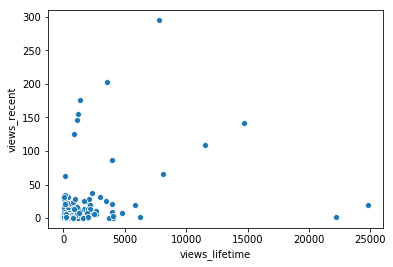

In [20]:
view_vs = sns.scatterplot(x='views_lifetime', y='views_recent', data=combined)

- <b> create boolean variable indicating data scource</b>

In [21]:
def create_boolean(data, variable):
    boo = data[variable]
    for i in range (len(boo)):
        if pd.isnull(boo[i]):
            boo[i] = '0'
        else:
            boo[i] = '1'
    return boo       

In [22]:
three_measures = combined[['views_recent','views_lifetime', 'shares']]

from_usr_act = create_boolean(three_measures, 'views_recent')
from_mkt_lib = create_boolean(three_measures, 'views_lifetime')
from_top_mkt = create_boolean(three_measures, 'shares')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [23]:
measures = pd.concat([from_usr_act, from_mkt_lib, from_top_mkt], axis=1).astype(int)
measures = measures.rename(index=str, columns={"views_recent": "from_usr_act", "views_lifetime": "from_mkt_lib", 
                                               "shares": "from_top_mkt"})
measures.head()

,from_usr_act,from_mkt_lib,from_top_mkt
0,0,1,0
1,1,1,1
2,1,0,0
3,1,0,0
4,0,1,0


In [24]:
measurement = np.array(measures)
source = []
for i in range (len(measurement)):
    list = []
    for j in range (3):
        if measurement[i][j] == 1:
            list.append(j)
    source.append(list)
#source

In [25]:
data_source = source
for i in range (len(data_source)):
    for j in range(len(data_source[i])):
        if data_source[i][j] == 0:
            data_source[i][j] = 'user activity'
        elif data_source[i][j] == 1:
            data_source[i][j] = 'library marketing'
        elif data_source[i][j] == 2:
            data_source[i][j] = 'top marketing'
#data_source

- <b>Compute 3 quantile of each measurement and assign score

In [26]:
## Remove NaN temporarily for computing quantile
tmp = combined[['views_recent', 'views_lifetime', 'shares']].dropna()
#tmp

tmp.describe()

,views_recent,views_lifetime,shares
count,219.000000,219.000000,219.000000
mean,13.191781,1215.611872,11.378995
std,34.117844,2749.211577,28.116039
min,0.000000,0.000000,0.000000
25%,0.000000,160.000000,2.000000
50%,3.000000,487.000000,4.000000
75%,11.000000,1136.000000,11.000000
max,295.000000,24783.000000,264.000000


In [46]:
def compute_quantile(df, variable):
    tmp = df[variable].sort_values()
    lv1_len = math.ceil(1/3 * len(tmp))
    lv2_len = math.ceil(2/3 * len(tmp))
    level1 = tmp[lv1_len]
    level2 = tmp[lv2_len]
    return level1, level2

In [54]:
view_recent_lv1, view_recent_lv2 = compute_quantile(tmp, 'views_recent')
view_lifetime_lv1, view_lifetime_lv2 = compute_quantile(tmp, 'views_lifetime')
shares_lv1, shares_lv2 = compute_quantile(tmp, 'shares')

- <b> impute missing values with 0</b>

In [27]:
def impute_missing(data, variable):
    value = data[variable]
    for i in range (len(value)):
        if pd.isnull(value[i]):
            value[i] = '0'
    return value

In [28]:
three_impute = combined[['views_recent','views_lifetime', 'shares']]

views_recent_impute = impute_missing(three_impute, 'views_recent')
views_lifetime_impute = impute_missing(three_impute, 'views_lifetime')
shares_impute = impute_missing(three_impute, 'shares')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [52]:
## Function that converts the grouping results into score
def score_convert(data, level_1, level_2):
    val = data
    for i in range (len(val)):
        if val[i] <= level_1:
            val[i] = '1'
        elif level_1 < val[i] <= level_2:
            val[i] = '2'
        else:
            val[i] = '3'
    return val

In [55]:
recent_view_score = score_convert(views_recent_impute, view_recent_lv1, view_recent_lv2)
lifetime_view_score = score_convert(views_lifetime_impute, view_lifetime_lv1, view_lifetime_lv2)
share_score = score_convert(shares_impute, shares_lv1, shares_lv2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
score = pd.concat([recent_view_score, lifetime_view_score, share_score], axis=1).astype(float)

In [ ]:
score.head(5)

In [ ]:
## total = 1/3(recent_view) + 1/3(lifetime_view) + 1/3(shares)
s = np.array(score)
n = 0
for i in range (len(s)):
    for j in range (3):
        n += s[i][j]
    s[i] = n * 1/3
    n = 0

total = [s[i][0] for i in range(len(s))]

- <b> merge combined with boolean source, string source and total score </b>

In [ ]:
combined_boolean = pd.concat([combined, measures], axis=1)

In [ ]:
#combined_boolean

In [ ]:
new_combined = combined_boolean
new_combined['data_source'] = data_source
new_combined['total_score'] = total
new_combined.head()

- <b> export merged table and recent engagement report</b>

In [ ]:
user_act_file.to_csv('Recent_Engagement_Report.csv')
new_combined.to_csv('Merged_Engagement_Table.csv', index=False)

## Extra

- <b>Try k-means clustering on complete data</b>

In [ ]:
complete_data = new_combined[['asset_name', 'views_recent', 'downloads_recent', 'views_lifetime', 'shares', 
                              'total_score']].dropna()
#complete_data

In [ ]:
clustering_data = np.array(complete_data[complete_data.columns[1:]])
#clustering_data

In [ ]:
clustering_data

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=500, verbose=1) # initialization
kmeans.fit(clustering_data)

In [ ]:
clusters = kmeans.predict(clustering_data)
print (clusters)

In [ ]:
new_complete = complete_data
new_complete['cluster'] = clusters
#new_complete

In [ ]:
new_complete.to_csv("Complete_assets_with_cluster.csv", index=False)

- <b> create visualizations based on clustering </b>

In [ ]:
def overview(df, x_axis, y_axis):
    plt.figure(figsize = (8, 5))
    g = sns.scatterplot(x=x_axis, y=y_axis, hue='cluster', palette='Set2', data=df)
    plt.show()

In [ ]:
def cluster_view(df, x_axis, y_axis):
    g = sns.FacetGrid(df, col="cluster", hue="cluster", palette='Set2')
    g.map(plt.scatter, x_axis, y_axis, alpha=.7)
    g.add_legend()

1. views_recent vs views_lifetime

In [ ]:
plot = overview(new_complete, 'views_recent', 'views_lifetime')

In [ ]:
plot = cluster_view(new_complete, 'views_recent', 'views_lifetime')

2. views_recent vs shares

In [ ]:
plot = overview(new_complete, 'views_recent', 'shares')

In [ ]:
plot = cluster_view(new_complete, 'views_recent', 'shares')

3. views_recent vs total_score

In [ ]:
plot = overview(new_complete, 'views_recent', 'total_score')

In [ ]:
plot = cluster_view(new_complete, 'views_recent', 'total_score')

4. views_recent vs downloads_recent

In [ ]:
plot = overview(new_complete, 'views_recent', 'downloads_recent')

In [ ]:
plot = cluster_view(new_complete, 'views_recent', 'downloads_recent')

5. views_lifetime vs shares

In [ ]:
plot = overview(new_complete, 'views_lifetime', 'shares')

In [ ]:
plot = cluster_view(new_complete, 'views_lifetime', 'shares')

6. views_lifetime vs total_score

In [ ]:
plot = overview(new_complete, 'views_lifetime', 'total_score')

In [ ]:
plot = cluster_view(new_complete, 'views_lifetime', 'total_score')

7. views_lifetime vs downloads_recent

In [ ]:
plot = overview(new_complete, 'views_lifetime', 'downloads_recent')

In [ ]:
plot = cluster_view(new_complete, 'views_lifetime', 'downloads_recent')

8. downloads_recent vs shares

In [ ]:
plot = overview(new_complete, 'downloads_recent', 'shares')

In [ ]:
plot = cluster_view(new_complete, 'downloads_recent', 'shares')

9. downloads_recent vs total_score

In [ ]:
plot = overview(new_complete, 'downloads_recent', 'total_score')

In [ ]:
plot = cluster_view(new_complete, 'downloads_recent', 'total_score')

10. shares vs total_score

In [ ]:
plot = overview(new_complete, 'shares', 'total_score')

In [ ]:
plot = cluster_view(new_complete, 'shares', 'total_score')

In [ ]:
plt.figure(figsize = (8, 5))
g = sns.scatterplot(x='views_lifetime', y='views_recent', hue='cluster', size='total_score', palette='Set2', 
                    data=new_complete)
plt.show()

In [ ]:
plt.figure(figsize = (8,5))
g = sns.scatterplot(x='views_recent', y='shares', hue='cluster', size='total_score', palette='Set2', 
                    data=new_complete)
plt.show()